In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Mall_Customers (3).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop("CustomerID",axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.drop("Gender",axis=1,inplace=True)

In [10]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


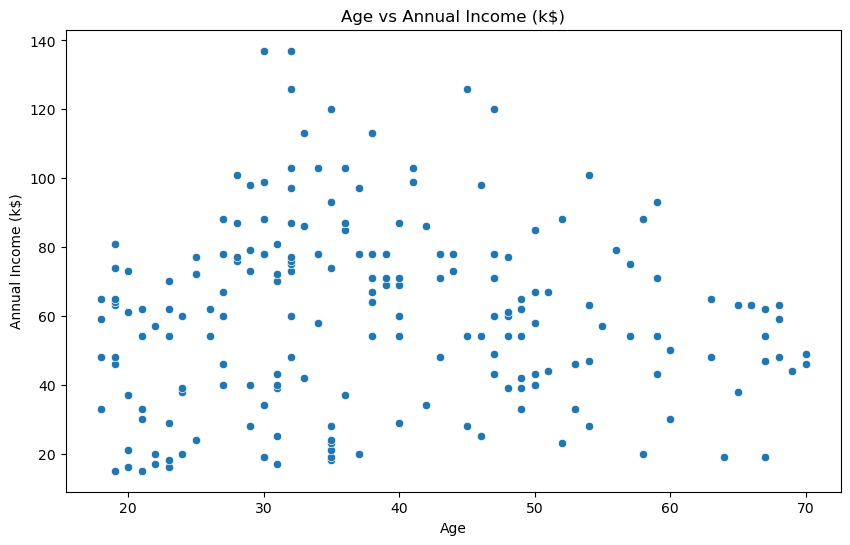

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age vs Annual Income (k$)")
plt.xlabel("Age")
plt.ylabel('Annual Income (k$)')
plt.show()

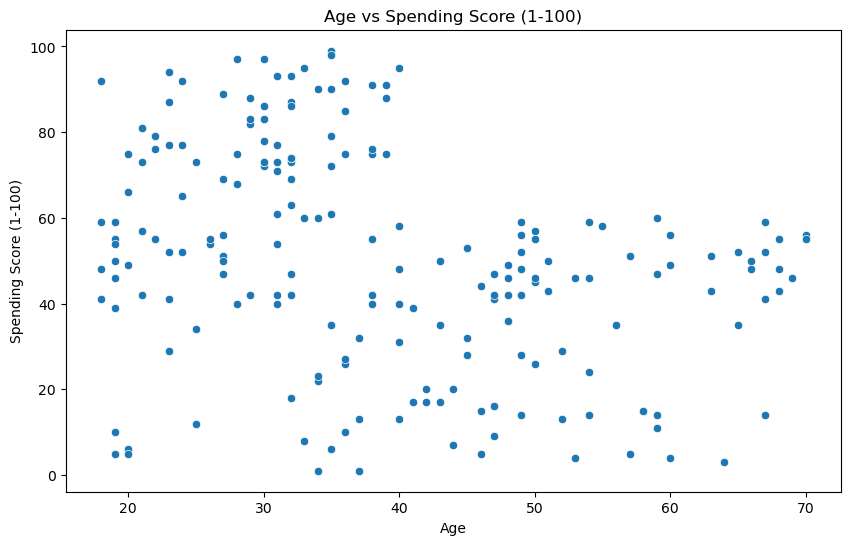

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age vs Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')
plt.show()

In [18]:
df.skew() #find the skewness of the data and check whether the data is skewed  or not which skewness is there

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [19]:
# Display skewness name normal , right skewed , left skewed

def skewness_name(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
print("Skewness of Age:", skewness_name(df["Age"].skew()))
print("Skewness of Annual Income:", skewness_name(df["Annual Income (k$)"].skew()))
print("Skewness of Spending Score:", skewness_name(df["Spending Score (1-100)"].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income: Right Skewed
Skewness of Spending Score: Left Skewed


In [20]:
# scalling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [23]:
# train kmeans clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


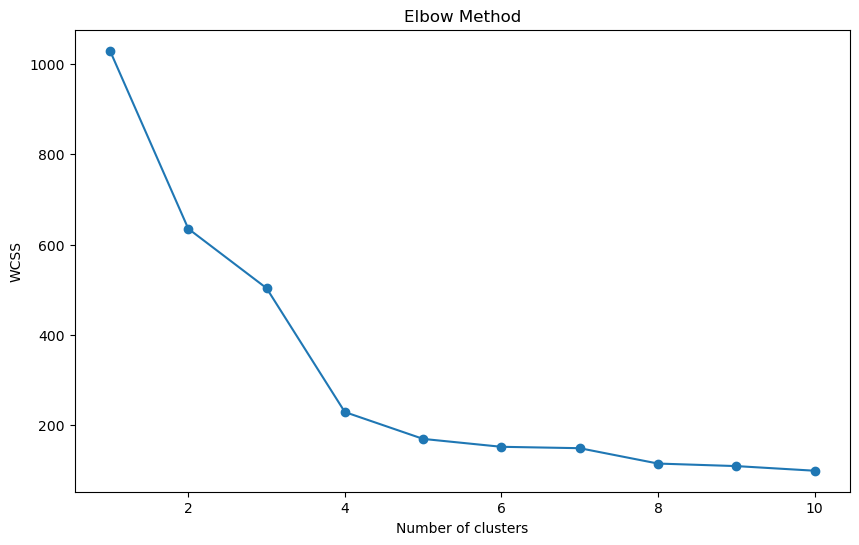

In [24]:
# check with ELBOW method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

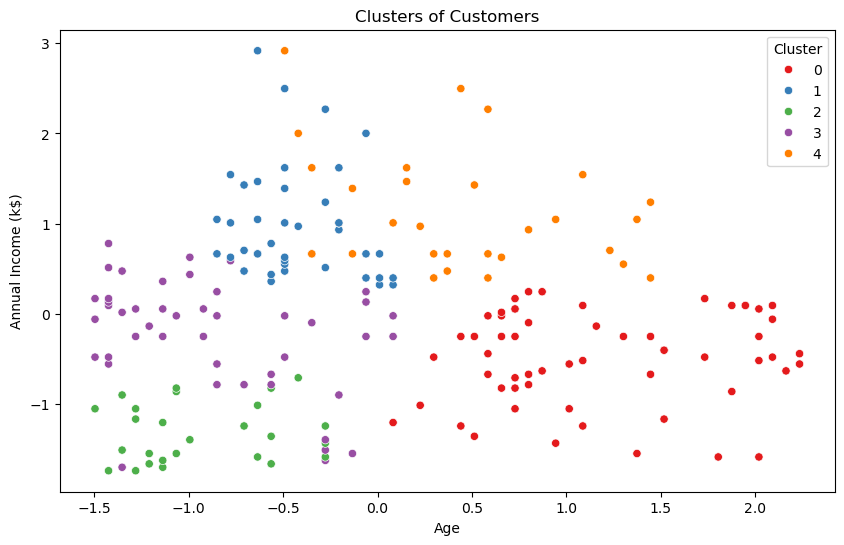

In [26]:
# display clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

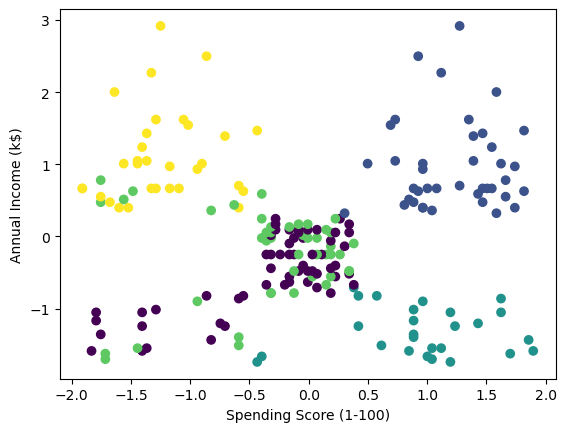

In [35]:
# display clusters using scatter plot

plt.scatter(df["Spending Score (1-100)"],
df["Annual Income (k$)"],
c = df["Cluster"]
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [36]:
df.to_csv("clustered_customers.csv",index=False)

In [37]:
# https://github.com/sumitsartale4952/pandas_method

In [38]:
# train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Cluster', axis=1)
y = df['Cluster']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Accuracy of Decision Tree Classifier:', accuracy_score(y_test, y_pred))

Accuracy of Decision Tree Classifier: 0.95


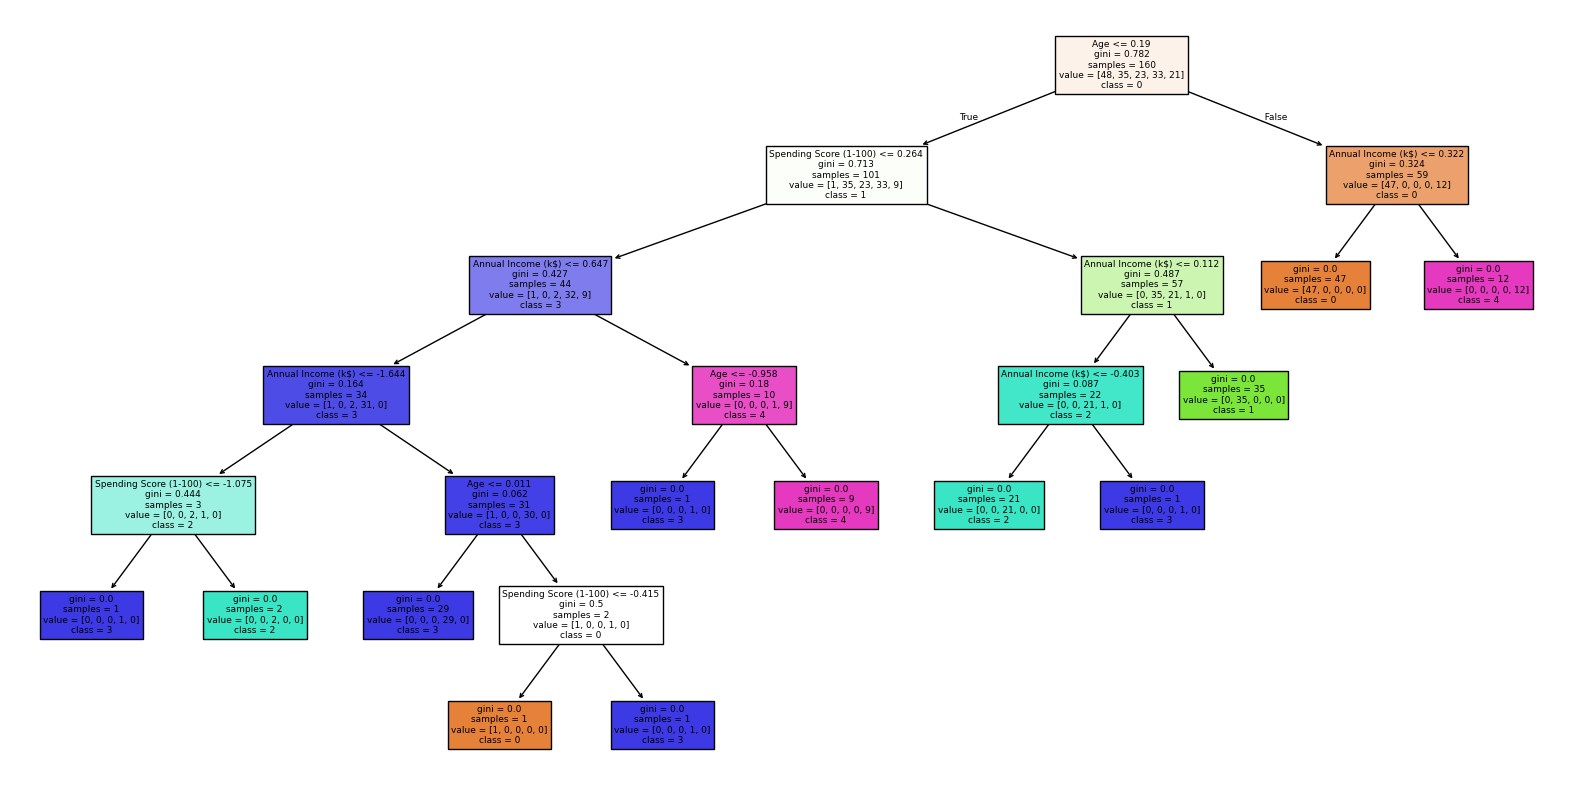

In [39]:
# graph the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=[str(i) for i in dtc.classes_])
plt.show()